In [286]:
#!pip install imblearn

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

## Generate Random Samples

In [288]:
np.random.seed(10)

n_samples_1 = 500
n_samples_2 = 7500
centers = [(0, 0), (2, 2)]
cluster_std = [1.75, 1.75]

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers, cluster_std=cluster_std, random_state=10)

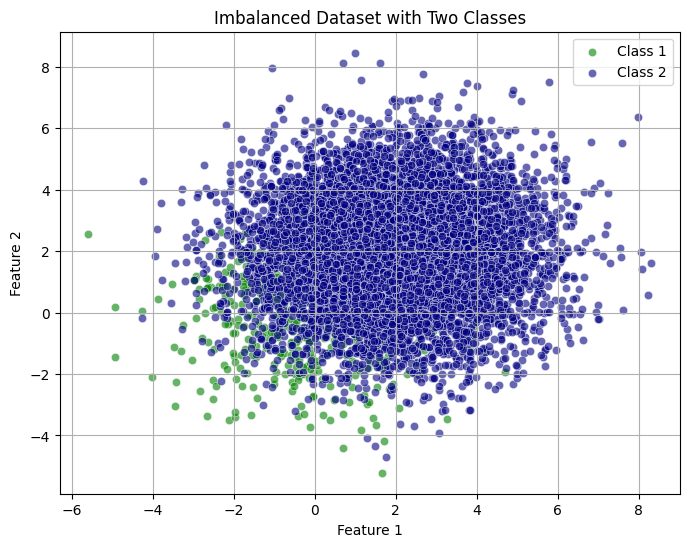

In [289]:
# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X[y == 0][:, 0],
                y=X[y == 0][:, 1],
                color='green', label='Class 1', alpha=0.6
)
sns.scatterplot(x=X[y == 1][:, 0],
                y=X[y == 1][:, 1],
                color='navy', label='Class 2', alpha=0.6
)

plt.title('Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Random Undersampling the Majority Class

In [290]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))

(6400, 2) (6400,)
(array([0, 1]), array([ 419, 5981]))


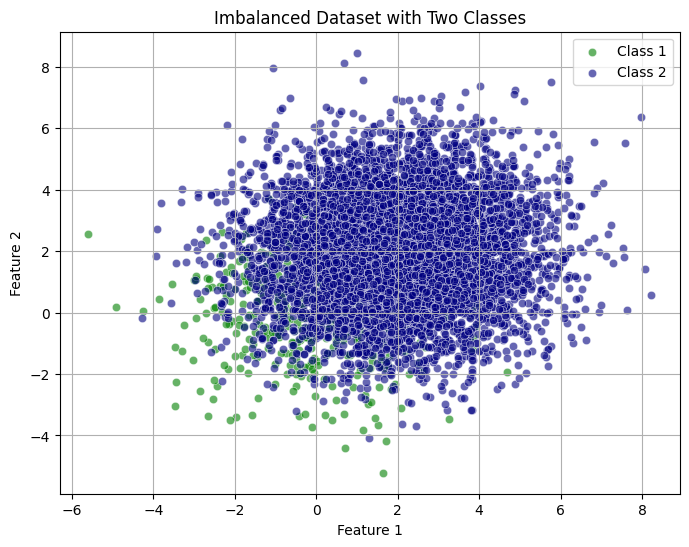

In [291]:
# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_train[y_train == 0][:, 0],
                y=X_train[y_train == 0][:, 1],
                color='green', label='Class 1', alpha=0.6
)
sns.scatterplot(x=X_train[y_train == 1][:, 0],
                y=X_train[y_train == 1][:, 1],
                color='navy', label='Class 2', alpha=0.6
)

plt.title('Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [292]:
# Applying Random Over Sampling
rus = RandomUnderSampler(random_state=10)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(X_resampled.shape, y_resampled.shape)
print(np.unique(y_resampled, return_counts=True))

(838, 2) (838,)
(array([0, 1]), array([419, 419]))


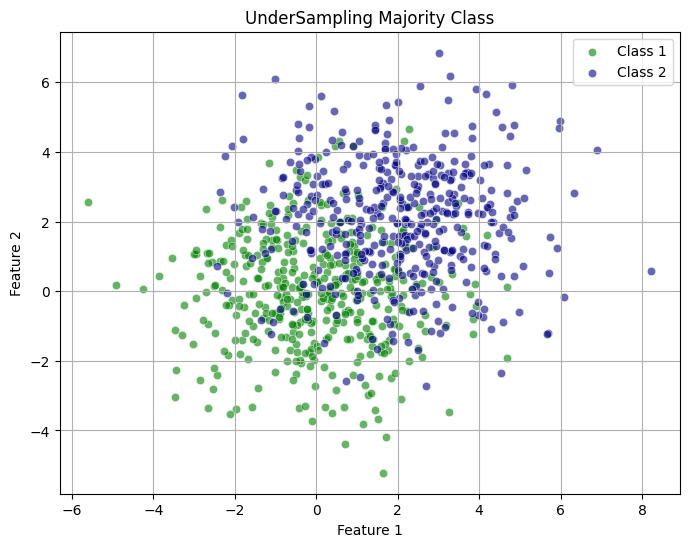

In [293]:
# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_resampled[y_resampled == 0][:, 0],
                y=X_resampled[y_resampled == 0][:, 1],
                color='green', label='Class 1', alpha=0.6
)
sns.scatterplot(x=X_resampled[y_resampled == 1][:, 0],
                y=X_resampled[y_resampled == 1][:, 1],
                color='navy', label='Class 2', alpha=0.6
)

plt.title('UnderSampling Majority Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Random Oversampling Minority Class by duplicating.

It oversamples the Minority class data multiple times to achieve imbalance. This technique might cause overfitting since if an ML algorithm detects that an observation is repeating again and again, it might assign higher weigtage or give it more importance. This will cause overfitting.

In [294]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))

(6400, 2) (6400,)
(array([0, 1]), array([ 419, 5981]))


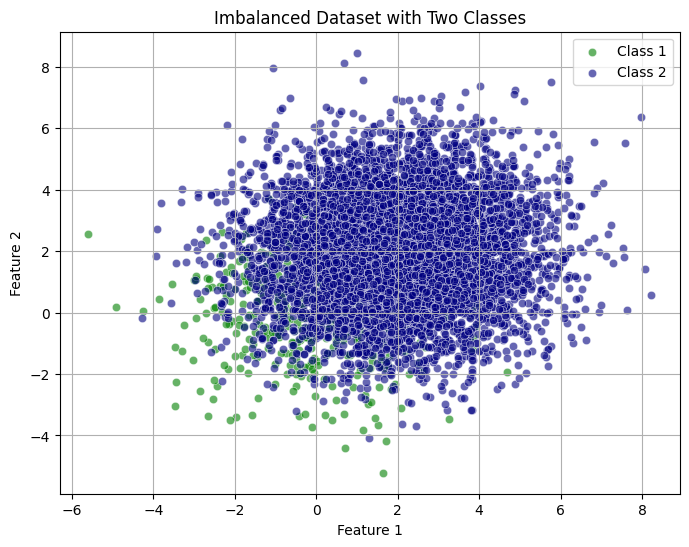

In [295]:
# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_train[y_train == 0][:, 0],
                y=X_train[y_train == 0][:, 1],
                color='green', label='Class 1', alpha=0.6
)
sns.scatterplot(x=X_train[y_train == 1][:, 0],
                y=X_train[y_train == 1][:, 1],
                color='navy', label='Class 2', alpha=0.6
)

plt.title('Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [296]:
# Applying Random Over Sampling
ros = RandomOverSampler(random_state=10)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print(X_resampled.shape, y_resampled.shape)
print(np.unique(y_resampled, return_counts=True))

(11962, 2) (11962,)
(array([0, 1]), array([5981, 5981]))


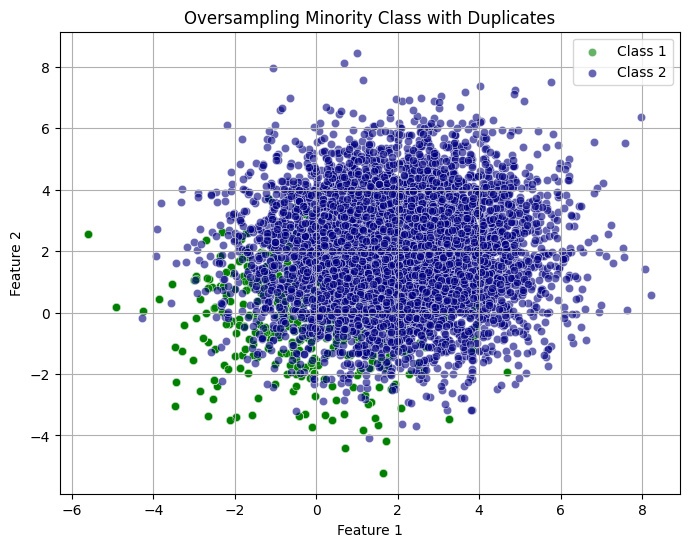

In [297]:
# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_resampled[y_resampled == 0][:, 0], 
                y=X_resampled[y_resampled == 0][:, 1], 
                color='green', label='Class 1', alpha=0.6
)

sns.scatterplot(x=X_resampled[y_resampled == 1][:, 0],
                y=X_resampled[y_resampled == 1][:, 1],
                color='navy', label='Class 2', alpha=0.6
)

plt.title('Oversampling Minority Class with Duplicates')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### We don't see any change in output becuse the datapoints are oversampled using duplicate data hence many green points are basically overlapping on top of each others.

## SMOTE (Synthetic Minority Oversampling Technique)

Instead of duplication of data, it generates new data points synthetically using interpollation.

### Explain SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to handle class imbalance in
datasets. It generates new synthetic data points to balance the classes.

### How SMOTE works
SMOTE works by creating new synthetic data points between existing data points of the minority class. It does
this by randomly selecting a data point from the minority class and then creating a new data point at a
distance of k nearest neighbors from the selected data point. 

1. You take a data point of minority class randomly.
2. Find out K nearest neighbour of this minority class having same class (Usually K = 3 or 5)
3. Choose a neighbour randomly.
4. Create a new data point between the randomly chosen neighbour and the randomly chosen minority class data point.
5. Keep repeating this process until new data poit is generated for all the neighbours.
6. Repeat the process until the desigreen number of synthetic data points is generated.

Following formual is used to generate new Data Point

$\text{New Data Point} = \text{Original Sample} - \text{Factor} * (\text{Original Sample} - \text{Neighbour})$  

$\text{Where Factor is Between } 0-1 $

In [298]:
# Split dataset into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))

(6400, 2) (6400,)
(array([0, 1]), array([ 419, 5981]))


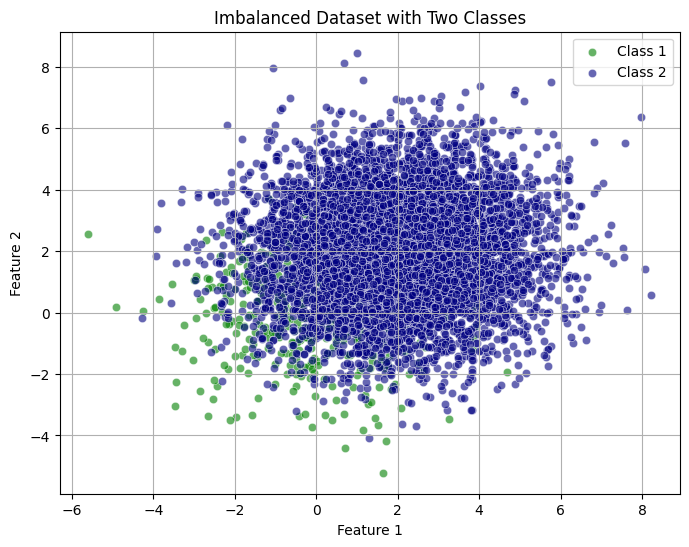

In [299]:
# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_train[y_train == 0][:, 0],
                y=X_train[y_train == 0][:, 1],
                color='green', label='Class 1', alpha=0.6
)

sns.scatterplot(x=X_train[y_train == 1][:, 0],
                y=X_train[y_train == 1][:, 1],
                color='navy', label='Class 2', alpha=0.6
)

plt.title('Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [300]:
smote = SMOTE(random_state=10)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

print(X_resampled_smote.shape, y_resampled_smote.shape)
print(np.unique(y_resampled_smote, return_counts=True))

(11962, 2) (11962,)
(array([0, 1]), array([5981, 5981]))


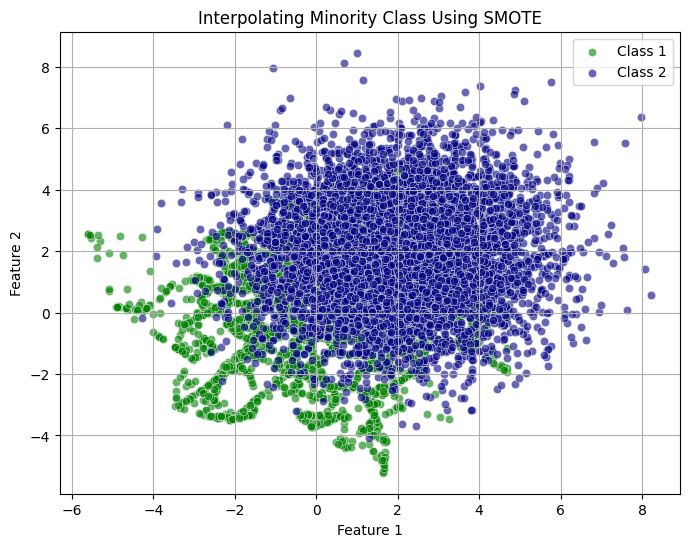

In [301]:
# Plotting
plt.figure(figsize=(8, 6))

sns.scatterplot(x=X_resampled_smote[y_resampled_smote == 0][:, 0], 
                y=X_resampled_smote[y_resampled_smote == 0][:, 1],
                color='green', label='Class 1', alpha=0.6
)
sns.scatterplot(x=X_resampled_smote[y_resampled_smote == 1][:, 0],
                y=X_resampled_smote[y_resampled_smote == 1][:, 1],
                color='navy', label='Class 2', alpha=0.6
)

plt.title('Interpolating Minority Class Using SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Other Techniques

1. **Ensempble Methods**  
    a. Balanced Random Forest  
  
2. **Cost Senstive Learning**  
    a. Using Higher Class Weights for minority class. Every Classification ML Model support Class Weight Parameters.  
    b. Use a Custom Loss Function Instead of Builtin  